# Analysis of competition results

In [5]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt
import torch
import matplotlib.pyplot as plt
import seaborn as sns


import sys
sys.path.insert(0, r"C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\code\RL_Project\DDPG_Hockey")
import DDPG


## 0.0 Load a pkl from the competition

In [6]:
# load and check some values of a pkl from one game in the competition

with open('competition_results/botStrongWon.pkl', 'rb') as f:
    data = pickle.load(f)

round = "0"  # 0, 1, 2 or 3

print(data.keys())

print(data["num_rounds"])

# we are playing a maximum of 4 rounds, each having max. 251 actions
print(data["actions"].shape)

# each round has 251 actions and 252 observations (or less if goal)
print(len(data[f"actions_round_{round}"]))
print(len(data[f"observations_round_{round}"]))

# each action includes 8 datapoints (do nothing, move, shoot, ...)
# each observation includes 18 datapoints (x pos player one, y pos player one, ...)
print(len(data[f"actions_round_{round}"][0]))
print(len(data[f"observations_round_{round}"][0]))


# more evaluations follow
print(data[f"observations_round_{round}"][0])
print(data[f"actions_round_{round}"][0])

dict_keys(['actions_round_0', 'observations_round_0', 'actions_round_1', 'observations_round_1', 'actions_round_2', 'observations_round_2', 'actions_round_3', 'observations_round_3', 'num_rounds', 'actions'])
[array([4])]
(793, 2, 4)
53
54
8
18
[-3.          0.          0.          0.          0.          0.
  3.          0.          0.          0.          0.          0.
  1.41537809  0.65743065  0.          0.          0.          0.        ]
[-1.  1. -1.  0. -1. -1.  1.  0.]


## Analysis of player movements

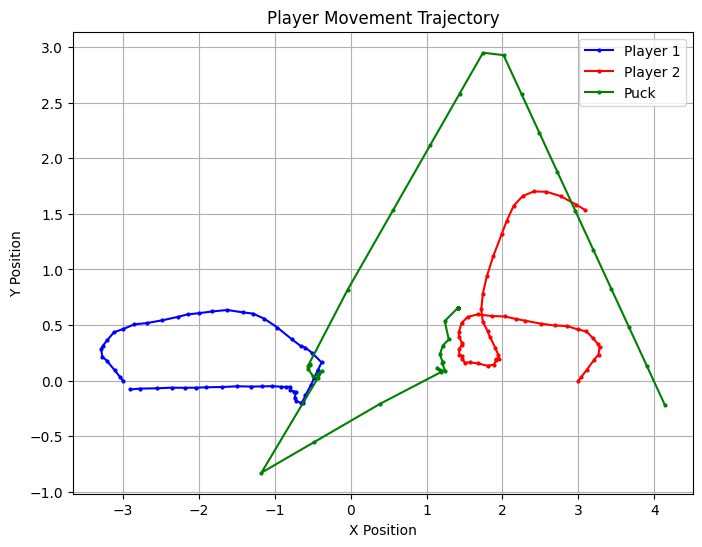

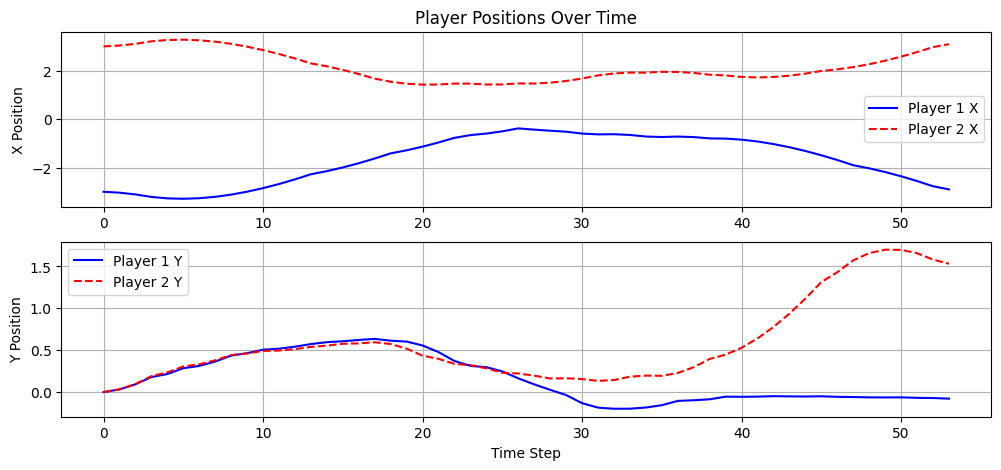

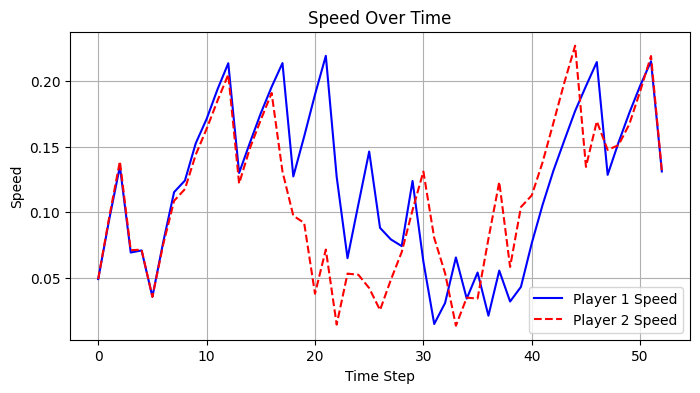

In [7]:
# Load observations for this round
observations = np.array(data[f"observations_round_{round}"])  # Convert to NumPy array

# Extract player 1 positions
x_player1 = observations[:, 0]  # X position of player 1
y_player1 = observations[:, 1]  # Y position of player 1

# Extract player 2 positions
x_player2 = observations[:, 6]  # X position of player 2
y_player2 = observations[:, 7]  # Y position of player 2

# Extract puck data
puck_x = observations[:, 12]
puck_y = observations[:, 13]
puck_time_p1 = observations[:, 16]
puck_time_p2 = observations[:, 17]

# Compute speed for both players
dx1 = np.diff(x_player1)
dy1 = np.diff(y_player1)
speed_player1 = np.sqrt(dx1**2 + dy1**2)

dx2 = np.diff(x_player2)
dy2 = np.diff(y_player2)
speed_player2 = np.sqrt(dx2**2 + dy2**2)

# Compute speed puck
dx3 = np.diff(puck_x)
dy3 = np.diff(puck_y)
speed_puck = np.sqrt(dx3**2 + dy3**2)

# Create time axis
time_steps = np.arange(len(x_player1))  # Time steps for plotting

# ---- PLOT 1: Player movement trajectory ----
plt.figure(figsize=(8, 6))
plt.plot(x_player1, y_player1, label="Player 1", color='blue', marker='o', markersize=2, linestyle='-')
plt.plot(x_player2, y_player2, label="Player 2", color='red', marker='o', markersize=2, linestyle='-')
plt.plot(puck_x, puck_y, label="Puck", color='green', marker='o', markersize=2, linestyle='-')
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Player Movement Trajectory")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 2: X & Y Positions over time ----
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(time_steps, x_player1, label="Player 1 X", color='blue')
plt.plot(time_steps, x_player2, label="Player 2 X", color='red', linestyle='dashed')
plt.ylabel("X Position")
plt.title("Player Positions Over Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_steps, y_player1, label="Player 1 Y", color='blue')
plt.plot(time_steps, y_player2, label="Player 2 Y", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 3: Speed over time ----
plt.figure(figsize=(8, 4))
plt.plot(time_steps[:-1], speed_player1, label="Player 1 Speed", color='blue')
plt.plot(time_steps[:-1], speed_player2, label="Player 2 Speed", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Speed")
plt.title("Speed Over Time")
plt.legend()
plt.grid(True)
plt.show()



## Analysis of actions of one round

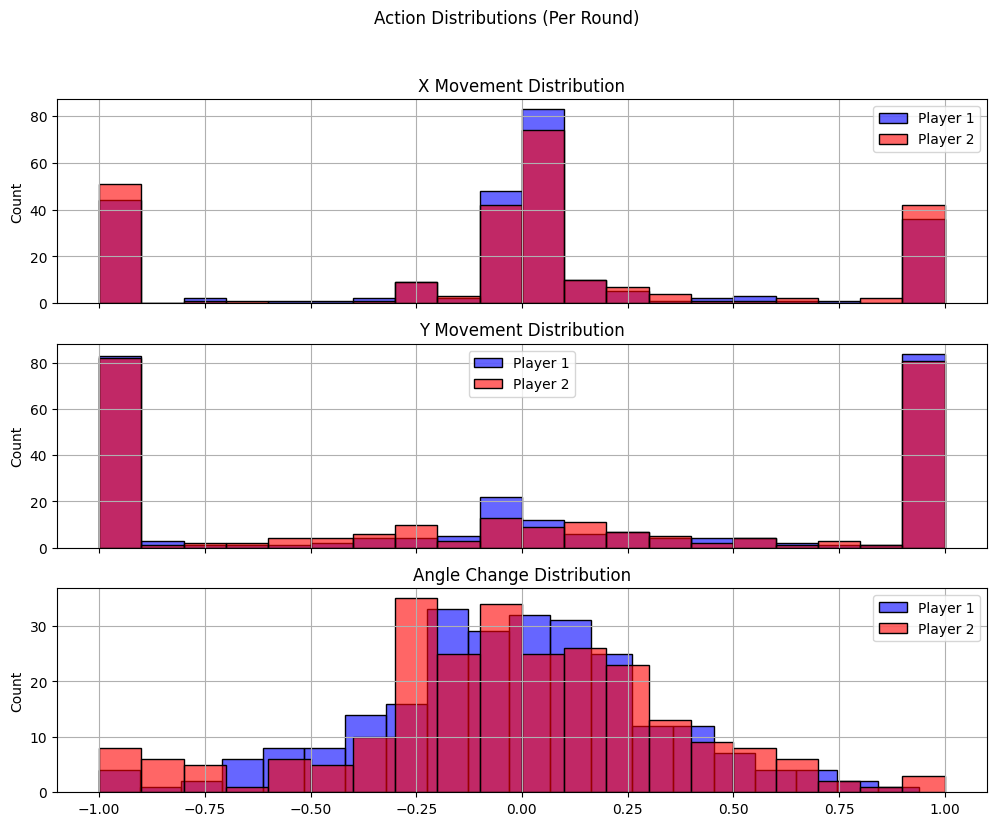

Player 1 - Mean X Movement: -0.020, Variance: 0.341
Player 2 - Mean X Movement: -0.014, Variance: 0.391
Player 1 - Mean Y Movement: 0.013, Variance: 0.705
Player 2 - Mean Y Movement: -0.007, Variance: 0.696
Player 1 Shots: 2.0
Player 2 Shots: 1.0
Game Result: Draw 🤝


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

round = 3

# Load actions for this round
actions = np.array(data[f"actions_round_{round}"])  # Shape: (int, 8)

# Extract actions for Player 1 and Player 2
actions_p1 = actions[:, :4]  # Shape: (int, 4)
actions_p2 = actions[:, 4:]  # Shape: (int, 4)

# Separate movement and shooting
x_movement_p1, y_movement_p1, angle_p1, shoot_p1 = actions_p1.T
x_movement_p2, y_movement_p2, angle_p2, shoot_p2 = actions_p2.T

# ---- PLOT: Continuous Action Distributions ----
fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

sns.histplot(x_movement_p1, bins=20, color='blue', alpha=0.6, label="Player 1", ax=axes[0])
sns.histplot(x_movement_p2, bins=20, color='red', alpha=0.6, label="Player 2", ax=axes[0])
axes[0].set_title("X Movement Distribution")
axes[0].legend()
axes[0].grid()

sns.histplot(y_movement_p1, bins=20, color='blue', alpha=0.6, label="Player 1", ax=axes[1])
sns.histplot(y_movement_p2, bins=20, color='red', alpha=0.6, label="Player 2", ax=axes[1])
axes[1].set_title("Y Movement Distribution")
axes[1].legend()
axes[1].grid()

sns.histplot(angle_p1, bins=20, color='blue', alpha=0.6, label="Player 1", ax=axes[2])
sns.histplot(angle_p2, bins=20, color='red', alpha=0.6, label="Player 2", ax=axes[2])
axes[2].set_title("Angle Change Distribution")
axes[2].legend()
axes[2].grid()

plt.suptitle("Action Distributions (Per Round)")
plt.show()

# ---- MEAN & VARIANCE: Who Moves More? ----
print(f"Player 1 - Mean X Movement: {np.mean(x_movement_p1):.3f}, Variance: {np.var(x_movement_p1):.3f}")
print(f"Player 2 - Mean X Movement: {np.mean(x_movement_p2):.3f}, Variance: {np.var(x_movement_p2):.3f}")
print(f"Player 1 - Mean Y Movement: {np.mean(y_movement_p1):.3f}, Variance: {np.var(y_movement_p1):.3f}")
print(f"Player 2 - Mean Y Movement: {np.mean(y_movement_p2):.3f}, Variance: {np.var(y_movement_p2):.3f}")

# ---- Shooting Analysis ----
num_shots_p1 = np.sum(shoot_p1)
num_shots_p2 = np.sum(shoot_p2)

print(f"Player 1 Shots: {num_shots_p1}")
print(f"Player 2 Shots: {num_shots_p2}")

# ---- Load Observations for Puck Analysis ----
observations = np.array(data[f"observations_round_{round}"])

# Extract puck data
puck_x = observations[:, 12]
puck_y = observations[:, 13]
puck_time_p1 = observations[:, 16]
puck_time_p2 = observations[:, 17]

# ---- Detect Goals ----
goal_p1 = np.any(puck_x > 3)  # Player 1 scores if puck crosses x > 3
goal_p2 = np.any(puck_x < -3)  # Player 2 scores if puck crosses x < -3

# ---- Determine Winner ----
if goal_p1 and not goal_p2:
    winner = "Player 1 🏆"
elif goal_p2 and not goal_p1:
    winner = "Player 2 🏆"
elif goal_p1 and goal_p2:
    winner = "Draw 🤝"
else:
    winner = "No goals scored ⚠️"

print("Game Result:", winner)

## Analysis of all actions

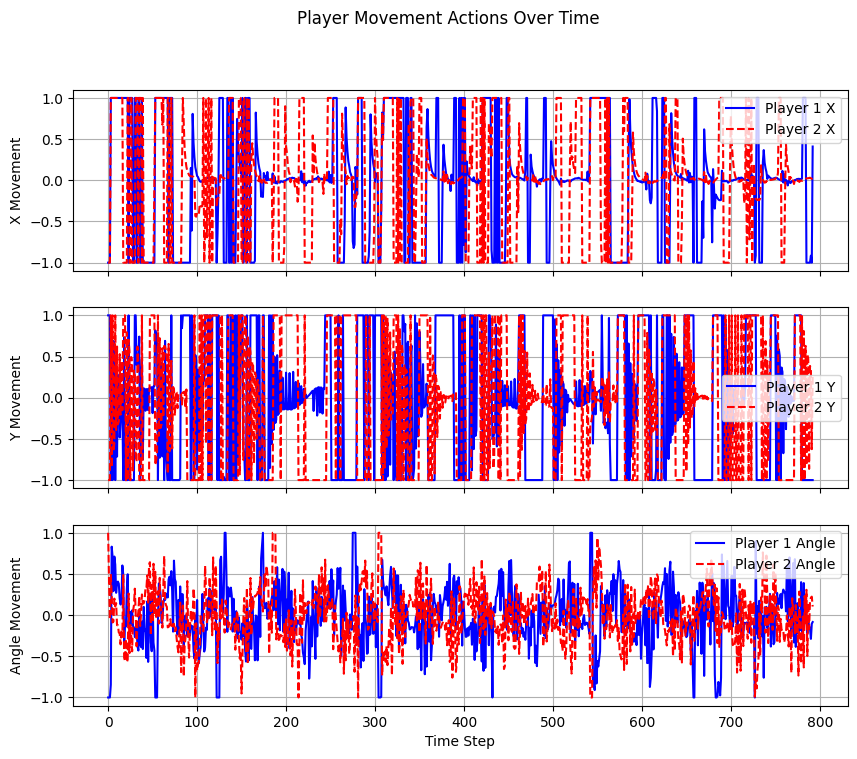

Player 1 Shots: 6.0
Player 2 Shots: 8.0

🔍 Game Outcome Analysis:
🏆 Player 1 WINS!
Player 2 Unique X Movements: [-1.00000000e+00 -8.13646078e-01 -7.40952492e-01 -7.16939867e-01
 -6.92234904e-01 -6.90601587e-01 -6.55056238e-01 -6.13735437e-01
 -5.99861145e-01 -5.33044338e-01 -4.97967005e-01 -4.89571571e-01
 -4.41626519e-01 -4.33768719e-01 -4.09340009e-01 -4.06507999e-01
 -4.02209103e-01 -4.01360989e-01 -3.90958801e-01 -3.86882067e-01
 -3.52024555e-01 -3.45661521e-01 -3.33209038e-01 -3.24236348e-01
 -3.22687268e-01 -3.22540224e-01 -3.18713188e-01 -3.13190579e-01
 -3.12607288e-01 -3.12404633e-01 -2.88486481e-01 -2.82609463e-01
 -2.82102920e-01 -2.59750947e-01 -2.40912437e-01 -2.39171982e-01
 -2.33922005e-01 -2.31790543e-01 -2.23011971e-01 -2.22015381e-01
 -2.19058990e-01 -2.07676888e-01 -2.01067924e-01 -1.93004608e-01
 -1.90531440e-01 -1.87749863e-01 -1.85379982e-01 -1.65257454e-01
 -1.39775515e-01 -1.18430831e-01 -7.61698857e-02 -5.78975677e-02
 -4.71625328e-02 -4.63939533e-02 -4.5005723

In [25]:

# Load the actions dataset
actions = np.array(data["actions"])  # Shape: (793, 2, 4)

# Separate actions for Player 1 and Player 2
actions_p1 = actions[:, 0, :]  # (793, 4) -> Player 1 actions
actions_p2 = actions[:, 1, :]  # (793, 4) -> Player 2 actions

# Extract individual movement actions
x_movement_p1 = actions_p1[:, 0]
y_movement_p1 = actions_p1[:, 1]
angle_movement_p1 = actions_p1[:, 2]
shots_p1 = actions_p1[:, 3]

x_movement_p2 = actions_p2[:, 0]
y_movement_p2 = actions_p2[:, 1]
angle_movement_p2 = actions_p2[:, 2]
shots_p2 = actions_p2[:, 3]

# ---- PLOT: Action Magnitude Over Time ----
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

axes[0].plot(x_movement_p1, label="Player 1 X", color="blue")
axes[0].plot(x_movement_p2, label="Player 2 X", color="red", linestyle="dashed")
axes[0].set_ylabel("X Movement")
axes[0].legend()
axes[0].grid()

axes[1].plot(y_movement_p1, label="Player 1 Y", color="blue")
axes[1].plot(y_movement_p2, label="Player 2 Y", color="red", linestyle="dashed")
axes[1].set_ylabel("Y Movement")
axes[1].legend()
axes[1].grid()

axes[2].plot(angle_movement_p1, label="Player 1 Angle", color="blue")
axes[2].plot(angle_movement_p2, label="Player 2 Angle", color="red", linestyle="dashed")
axes[2].set_ylabel("Angle Movement")
axes[2].set_xlabel("Time Step")
axes[2].legend()
axes[2].grid()

plt.suptitle("Player Movement Actions Over Time")
plt.show()

# ---- Shooting Analysis ----
num_shots_p1 = np.sum(shots_p1)
num_shots_p2 = np.sum(shots_p2)

print(f"Player 1 Shots: {num_shots_p1}")
print(f"Player 2 Shots: {num_shots_p2}")

# ---- Check If Player 2 is Moving ----
print("Player 2 Unique X Movements:", np.unique(x_movement_p2))
print("Player 2 Unique Y Movements:", np.unique(y_movement_p2))
print("Player 2 Unique Angle Movements:", np.unique(angle_movement_p2))